In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Convert PDF data to CSV for EDA

!pip install pdfplumber

import pdfplumber
import pandas as pd

pdf_path = "Database_IIT_BBS_LAB_Concrete.pdf"
tables = []

with pdfplumber.open(pdf_path) as pdf:
    for page in pdf.pages:
        table = page.extract_table()
        if table:
            tables.extend(table)

# Remove headers and empty rows
cleaned = [row for row in tables if None not in row and all(cell.strip() != '' for cell in row)]

# Convert to DataFrame
columns = [
    "serial_no", "cement", "flyash", "ggbs", "mk", "tcm", "water", "water_tcm",
    "sp", "vma", "nca_20_down", "nca_10_down", "rca_20_down", "rca_10_down",
    "sand", "age", "cs"
]
df = pd.DataFrame(cleaned, columns=columns)

# Fix data types
df = df.dropna()
df = df.apply(pd.to_numeric, errors='coerce')

df.head()


,serial_no,cement,flyash,ggbs,mk,tcm,water,water_tcm,sp,vma,nca_20_down,nca_10_down,rca_20_down,rca_10_down,sand,age,cs
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,550.0,0.0,0.0,0.0,550.0,165.0,0.30,3.30,0.28,0.0,0.0,247.0,337.0,607.0,7.0,49.71
2,2.0,385.0,165.0,0.0,0.0,550.0,148.0,0.26,6.05,1.10,0.0,0.0,270.0,432.0,729.0,7.0,18.53
3,3.0,275.0,275.0,0.0,0.0,550.0,146.0,0.26,5.50,1.10,0.0,0.0,276.0,441.0,745.0,7.0,15.09
4,4.0,165.0,385.0,0.0,0.0,550.0,172.0,0.30,4.40,1.10,0.0,0.0,280.0,448.0,757.0,7.0,6.34


In [ ]:
df.drop(columns=['serial_no', 'tcm'],inplace=True) # drop unneccessary columns
df.drop(index=0,inplace=True) # row contains NaN
df.reset_index(drop=True,inplace=True)
df.head()

,cement,flyash,ggbs,mk,water,water_tcm,sp,vma,nca_20_down,nca_10_down,rca_20_down,rca_10_down,sand,age,cs
0,550.0,0.0,0.0,0.0,165.0,0.30,3.30,0.28,0.0,0.0,247.0,337.0,607.0,7.0,49.71
1,385.0,165.0,0.0,0.0,148.0,0.26,6.05,1.10,0.0,0.0,270.0,432.0,729.0,7.0,18.53
2,275.0,275.0,0.0,0.0,146.0,0.26,5.50,1.10,0.0,0.0,276.0,441.0,745.0,7.0,15.09
3,165.0,385.0,0.0,0.0,172.0,0.30,4.40,1.10,0.0,0.0,280.0,448.0,757.0,7.0,6.34
4,385.0,0.0,165.0,0.0,155.0,0.28,6.60,1.38,0.0,0.0,361.0,417.0,815.0,7.0,42.83


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cement       167 non-null    float64
 1   flyash       167 non-null    float64
 2   ggbs         167 non-null    float64
 3   mk           167 non-null    float64
 4   water        167 non-null    float64
 5   water_tcm    167 non-null    float64
 6   sp           167 non-null    float64
 7   vma          167 non-null    float64
 8   nca_20_down  167 non-null    float64
 9   nca_10_down  167 non-null    float64
 10  rca_20_down  167 non-null    float64
 11  rca_10_down  167 non-null    float64
 12  sand         167 non-null    float64
 13  age          167 non-null    float64
 14  cs           167 non-null    float64
dtypes: float64(15)
memory usage: 19.7 KB


In [ ]:
df.isnull().sum() # check for null values

,0
cement,0
flyash,0
ggbs,0
mk,0
water,0
water_tcm,0
sp,0
vma,0
nca_20_down,0
nca_10_down,0


In [ ]:
df.duplicated().sum() # check for duplicates in dataset

np.int64(3)

In [ ]:
df[df.duplicated(keep=False)]
# Rows 147, 152, 153 are exact duplicates of the Rows 83, 88, 89.

,cement,flyash,ggbs,mk,water,water_tcm,sp,vma,nca_20_down,nca_10_down,rca_20_down,rca_10_down,sand,age,cs
82,680.0,0.0,0.0,0.0,170.0,0.25,2.04,0.0,0.0,0.0,415.0,466.0,562.0,3.0,45.00
87,680.0,0.0,0.0,0.0,170.0,0.25,2.04,0.0,0.0,0.0,415.0,466.0,562.0,7.0,50.46
88,480.0,0.0,0.0,0.0,170.0,0.35,1.20,0.0,0.0,0.0,458.0,514.0,620.0,7.0,38.60
146,680.0,0.0,0.0,0.0,170.0,0.25,2.04,0.0,0.0,0.0,415.0,466.0,562.0,3.0,45.00
151,680.0,0.0,0.0,0.0,170.0,0.25,2.04,0.0,0.0,0.0,415.0,466.0,562.0,7.0,50.46
152,480.0,0.0,0.0,0.0,170.0,0.35,1.20,0.0,0.0,0.0,458.0,514.0,620.0,7.0,38.60


In [ ]:
df = df.drop_duplicates().reset_index(drop=True) # drop duplicate data and reset index

In [ ]:
df.describe()

,cement,flyash,ggbs,mk,water,water_tcm,sp,vma,nca_20_down,nca_10_down,rca_20_down,rca_10_down,sand,age,cs
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,338.079268,53.060976,56.128049,12.024390,170.658537,0.419573,2.517951,0.332561,42.932927,42.475610,381.512195,479.591463,648.073171,27.725610,34.418659
std,145.974071,105.754821,106.618588,27.473791,14.775805,0.165033,2.321779,0.492990,153.318592,151.687055,131.876475,154.338478,83.102609,28.328556,18.310001
min,113.000000,0.000000,0.000000,0.000000,146.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,516.000000,3.000000,6.000000
25%,227.000000,0.000000,0.000000,0.000000,170.000000,0.280000,0.460000,0.000000,0.000000,0.000000,340.000000,447.000000,558.000000,7.000000,18.000000
50%,309.000000,0.000000,0.000000,0.000000,170.000000,0.350000,1.950000,0.000000,0.000000,0.000000,410.000000,522.500000,653.000000,14.000000,34.000000
75%,468.000000,68.000000,28.250000,0.000000,170.000000,0.550000,4.400000,0.687500,0.000000,0.000000,482.000000,573.000000,700.000000,28.000000,48.667500
max,680.000000,385.000000,385.000000,102.000000,221.000000,0.750000,6.600000,1.380000,604.000000,598.000000,516.000000,633.000000,815.000000,90.000000,73.760000


In [ ]:
df.shape

(164, 15)

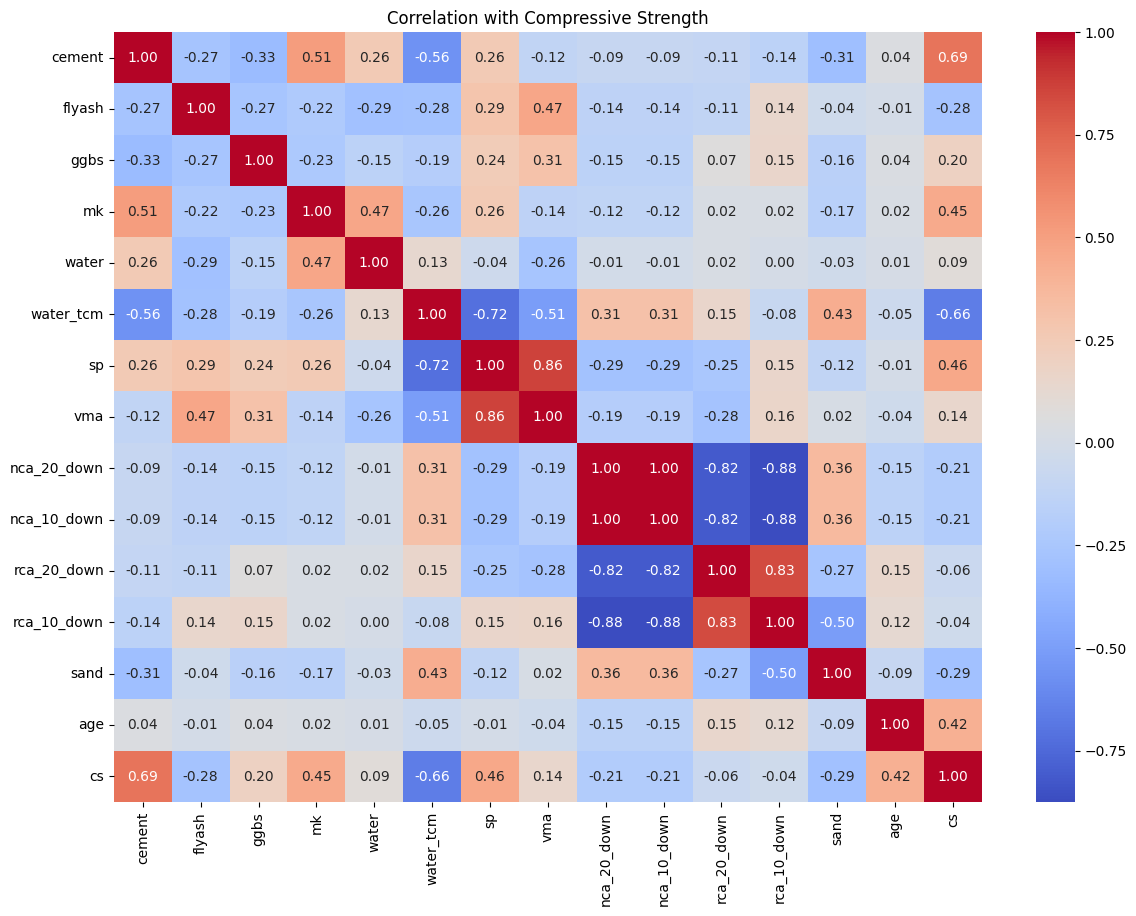

In [ ]:
# plot correlation heatmap
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation with Compressive Strength")
plt.show()

Text(0.5, 1.0, 'Compressive Strength Distribution')

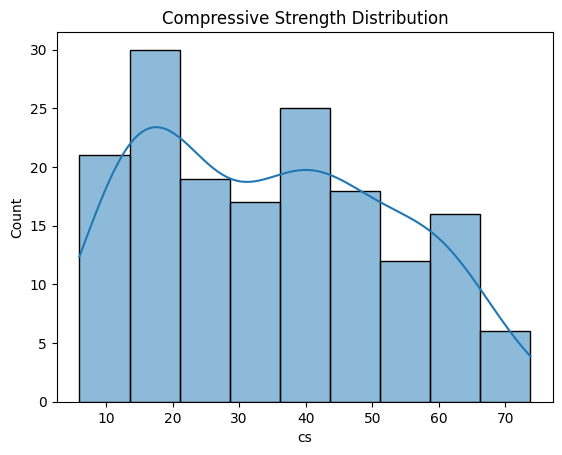

In [ ]:
# plotting distribution of compressive strength
sns.histplot(df['cs'], kde=True)
plt.title("Compressive Strength Distribution")

In [ ]:
# save cleaned dataset for modeling
df.to_csv("cleaned_concrete_data.csv", index=False)